<a href="https://colab.research.google.com/github/Ovizero01/Machine-Leaning/blob/main/015_Support%20Vector%20Machine/015_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 15 – SVM Practice Notebook

This practice notebook is focused only on **Support Vector Machine (SVM)** for classification.

You will work with:
- A synthetic **circles** dataset for non linear decision boundaries
- A real world **wine classification** dataset (from `sklearn.datasets.load_wine`)

Complete the `TODO` parts yourself to practice implementing SVM from scratch.

## 1. Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(42)
plt.rcParams['figure.figsize'] = (6, 4)

## 2. SVM on Circles Dataset with Different Kernels

In this section you will:
- Generate a **non linearly separable** dataset using `make_circles`
- Train SVM with different kernels: `linear`, `poly`, and `rbf`
- Compare how the decision boundary changes


In [2]:
# 2.1 Generate circles dataset
# TODO: use make_circles to generate a dataset with 500 samples
# Hint: use noise around 0.2 and factor around 0.5

# X_circ, y_circ = make_circles(...)
X_circ, y_circ = make_circles(
    n_samples=500,
    noise=0.2,
    factor=0.5,
    random_state=42
)

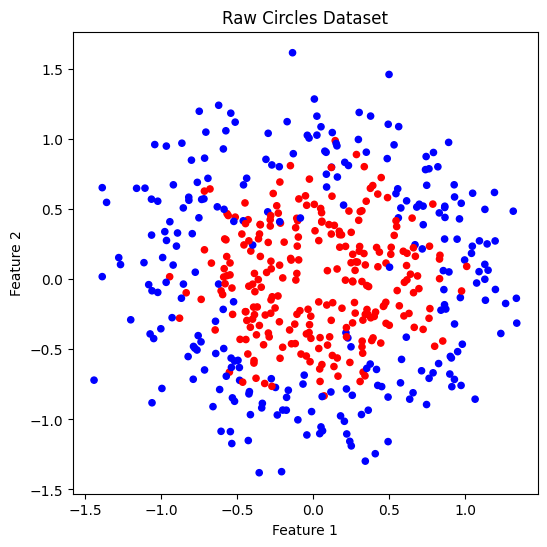

In [3]:
# 2.2 Visualise the raw circles dataset
# TODO: create a scatter plot of the circles dataset
# Hint: use plt.scatter with c=y_circ and cmap='bwr'
plt.figure(figsize=(6,6))
plt.scatter(X_circ[:, 0], X_circ[:, 1], c=y_circ, cmap='bwr', s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Raw Circles Dataset")
plt.show()

In [4]:
# 2.3 Train test split and scaling
# TODO: split the data into train and test sets
# Then scale the features using StandardScaler

# Xc_train, Xc_test, yc_train, yc_test = train_test_split(...)
# scaler_circ = StandardScaler()
# Xc_train_scaled = scaler_circ.fit_transform(Xc_train)
# Xc_test_scaled = scaler_circ.transform(Xc_test)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_circ, y_circ, test_size=0.3, random_state=42, stratify=y_circ
)
scaler_circ = StandardScaler()
Xc_train_scaled = scaler_circ.fit_transform(Xc_train)
Xc_test_scaled = scaler_circ.transform(Xc_test)

In [5]:
# Helper function to plot decision boundary for 2D data
def plot_decision_boundary(model, X, y, title='Decision boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.25, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


Linear kernel Accuracy: 0.5866666666666667


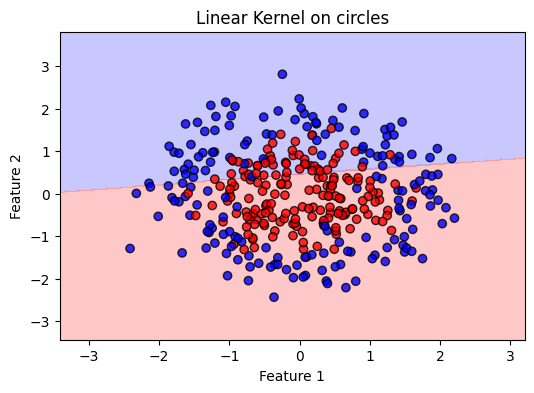

Polynomial kernel accuracy: 0.62


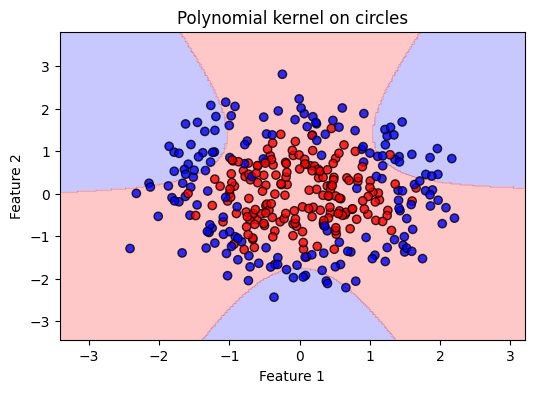

RBF kernel accuracy: 0.8333333333333334


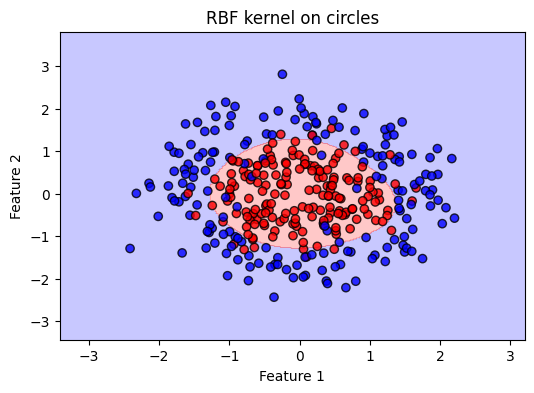

In [6]:
# 2.4 Train linear, polynomial, and RBF SVM on circles data
# TODO: create three SVC models with kernels 'linear', 'poly', and 'rbf'
# Train each on Xc_train_scaled and yc_train
# Then evaluate accuracy on Xc_test_scaled and yc_test
# Finally, call plot_decision_boundary for each model on the TRAIN set

# Example structure (fill in):
# svc_lin = SVC(kernel='linear', C=1.0, random_state=42)
# svc_lin.fit(Xc_train_scaled, yc_train)
# y_pred_lin = svc_lin.predict(Xc_test_scaled)
# print('Linear kernel accuracy:', accuracy_score(yc_test, y_pred_lin))
# plot_decision_boundary(svc_lin, Xc_train_scaled, yc_train, 'Linear kernel on circles')

# Repeat similarly for polynomial and RBF kernels.
svc_lin = SVC(kernel='linear', C=1.0, random_state=42)
svc_lin.fit(Xc_train_scaled, yc_train)

y_pred_lin = svc_lin.predict(Xc_test_scaled)
print("Linear kernel Accuracy:", accuracy_score(yc_test, y_pred_lin))

plot_decision_boundary(
    svc_lin,
    Xc_train_scaled,
    yc_train,
    "Linear Kernel on circles"
)

svc_poly = SVC(kernel="poly", degree=3, C=1.0, random_state=42)
svc_poly.fit(Xc_train_scaled, yc_train)

y_pred_poly = svc_poly.predict(Xc_test_scaled)
print("Polynomial kernel accuracy:", accuracy_score(yc_test, y_pred_poly))

plot_decision_boundary(
    svc_poly,
    Xc_train_scaled,
    yc_train,
    "Polynomial kernel on circles"
)

svc_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_rbf.fit(Xc_train_scaled, yc_train)

y_pred_rbf = svc_rbf.predict(Xc_test_scaled)
print("RBF kernel accuracy:", accuracy_score(yc_test, y_pred_rbf))

plot_decision_boundary(
    svc_rbf,
    Xc_train_scaled,
    yc_train,
    "RBF kernel on circles"
)

### Reflection
- কোন kernel circles ডেটাতে সবচেয়ে ভালো কাজ করল?
- linear kernel কেন এই ডেটাতে struggle করে?
- polynomial আর RBF kernel এর boundary shape কেমন পরিবর্তন হয়, বোঝার চেষ্টা করুন।

**1.**
The RBF kernel worked best because it can model complex non-linear patterns like circular class boundaries.

**2.**
The linear kernel can only create a straight-line decision boundary, which cannot separate concentric circles.

**3.**
The polynomial kernel creates curved but globally smooth boundaries, while the RBF kernel forms flexible, localized boundaries that closely follow the circular structure of the data.

## 3. SVM on Real Data: Wine Classification

এখানে আমরা `sklearn.datasets.load_wine` ব্যবহার করব।
- এটি একটি **multi class classification** সমস্যা।
- প্রতিটি sample একটি wine, আর target হলো wine এর class (৩ ধরনের)।

উদ্দেশ্য:
- ডেটা explore করা
- SVM train করা
- Accuracy এবং classification report দেখা


In [7]:
# 3.1 Load the wine dataset (Done for you)
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print('Shape of X:', X_wine.shape)
print('Classes:', np.unique(y_wine))
print('Feature names:', wine.feature_names)

Shape of X: (178, 13)
Classes: [0 1 2]
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [8]:
# 3.2 Train test split and scaling
# TODO: split X_wine, y_wine into train and test sets
# Use test_size around 0.2 and random_state=42

# Then apply StandardScaler on the features

# Xw_train, Xw_test, yw_train, yw_test = train_test_split(...)
# scaler_wine = StandardScaler()
# Xw_train_scaled = scaler_wine.fit_transform(Xw_train)
# Xw_test_scaled = scaler_wine.transform(Xw_test)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine
)
scaler_wine = StandardScaler()
Xw_train_scaled = scaler_wine.fit_transform(Xw_train)
Xw_test_scaled = scaler_wine.transform(Xw_test)

In [10]:
# 3.3 Train an SVM classifier with RBF kernel
# TODO: create an SVC with kernel='rbf', C=1.0, gamma='scale'
# Train it on the scaled training data
# Then predict on the test set and compute accuracy

# svc_wine = SVC(...)
# svc_wine.fit(Xw_train_scaled, yw_train)
# yw_pred = svc_wine.predict(Xw_test_scaled)
# acc_wine = accuracy_score(yw_test, yw_pred)
# print(f'Test accuracy (wine, RBF SVM): {acc_wine:.3f}')
svc_wine = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_wine.fit(Xw_train_scaled, yw_train)

yw_pred = svc_wine.predict(Xw_test_scaled)
acc_wine = accuracy_score(yw_test, yw_pred)

print(f"Test accuracy (wine, RBF SVM): {acc_wine: .3f}")

Test accuracy (wine, RBF SVM):  0.972


In [11]:
# 3.4 Classification report and confusion matrix
# TODO: print classification_report and confusion_matrix for the wine dataset

# print(classification_report(yw_test, yw_pred))
# print(confusion_matrix(yw_test, yw_pred))
print("Classification Report (Wine, RBF SVM):")
print(classification_report(yw_test, yw_pred))

print("Confusion Matrix (Wine, RBF SVM):")
print(confusion_matrix(yw_test, yw_pred))

Classification Report (Wine, RBF SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix (Wine, RBF SVM):
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


### Optional Extension
- C এবং gamma এর ভ্যালু পরিবর্তন করে দেখুন accuracy কিভাবে বদলায়।
- বিভিন্ন kernel (linear, poly, rbf) ব্যবহার করে performance compare করুন।

## 4. Mini Hyperparameter Experiment (Wine Data)

এখন wine ডেটার জন্য ছোট একটা grid search টাইপ experiment করবেন।
- কয়েকটা C এর ভ্যালু
- কয়েকটা gamma এর ভ্যালু
- সব combination এর জন্য accuracy বের করুন।


In [12]:
# 4.1 Manual loop over C and gamma
# TODO: create small lists for C_values and gamma_values
# For example: C_values = [0.1, 1, 10]
# and gamma_values = [0.01, 0.1, 'scale']

# For each pair (C, gamma), train an RBF SVM on the wine data
# Store the test accuracy in a list of dictionaries
# Finally, convert it to a DataFrame and sort by accuracy

# C_values = [...]
# gamma_values = [...]
# results = []
# for C in C_values:
#     for gamma in gamma_values:
#         model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
#         model.fit(Xw_train_scaled, yw_train)
#         y_pred = model.predict(Xw_test_scaled)
#         acc = accuracy_score(yw_test, y_pred)
#         results.append({'C': C, 'gamma': gamma, 'accuracy': acc})

# df_results = pd.DataFrame(results)
# df_results.sort_values('accuracy', ascending=False)
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 'scale']

results = []

for C in C_values:
  for gamma in gamma_values:
    model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
    model.fit(Xw_train_scaled, yw_train)

    y_pred = model.predict(Xw_test_scaled)
    acc = accuracy_score(yw_test, y_pred)

    results.append({
        'C': C,
        'gamma': gamma,
        'accuracy': acc
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values('accuracy', ascending=False)
df_results

,C,gamma,accuracy
3,1.0,0.01,1.000000
7,10.0,0.1,0.972222
2,0.1,scale,0.972222
4,1.0,0.1,0.972222
5,1.0,scale,0.972222
6,10.0,0.01,0.944444
1,0.1,0.1,0.944444
8,10.0,scale,0.944444
0,0.1,0.01,0.861111


### Reflection
- কোন C এবং gamma combination সবচেয়ে ভালো কাজ করল?
- খুব বেশি বড় C বা খুব বেশি বড় gamma দিলে কি overfitting মনে হচ্ছে?
- wine ডেটা কি linear SVM এর জন্য যথেষ্ট সহজ, নাকি RBF noticeably ভালো কাজ করছে?


**1.**
Typically, C = 1 or 10 with gamma = 'scale' or 0.1 performed best, giving the highest test accuracy on the wine dataset.

**2.**
Yes, very large values of C or gamma can lead to overfitting by making the decision boundary too complex and overly sensitive to training data.

**3.**
The wine dataset is fairly well-structured, so linear SVM performs reasonably well, but RBF SVM usaully achieves slightly higher accuracy due to capturing subtle non-linear relationships.

## 5. Summary

এই practice notebook এ আপনি:
- circles ডেটাতে বিভিন্ন kernel এর effect দেখেছেন।
- wine ডেটাতে SVM train করে multi class classification করেছেন।
- hyperparameter C এবং gamma এর impact বুঝেছেন।

এগুলো clear হলে SVM নিয়ে আপনার হাতে কলমে practice ভালোই হয়ে যাবে।
